**AZ Watch** is a popular video streaming platform specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument.

Their next goal is to leverage AI-driven solutions to analyze and make predictions about their subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. This project uses machine learning to predict subscribers likely to churn and find customer segments. This may help AZ Watch find interesting usage patterns to build subscriber personas in future marketing plans!

![Woman working on multiple screens](marketinganalytics.jpg)


The `data/AZWatch_subscribers.csv` **dataset** contains information about subscribers and their status over the last year:

|Column name|Description|
|-----------|-----------|
|`subscriber_id`|The unique identifier of each subscriber user|
|`age_group`|The subscriber's age group|
|`engagement_time`|Average time (in minutes) spent by the subscriber per session|
|`engagement_frequency`|Average weekly number of times the subscriber logged in the platform (sessions) over a year period|
|`subscription_status`|Whether the user remained subscribed to the platform by the end of the year period (subscribed), or unsubscribed and terminated her/his services (churned)|

Carefully observe and analyze the features in the dataset, asking yourself if there are any **categorical attributes** requiring pre-processing?

The subscribers dataset from the `data/AZWatch_subscribers.csv` file is already being loaded and split into training and test sets for you:

In [183]:
# Import the necessary modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, silhouette_score
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

# Specify the file path of your CSV file
file_path = "data/AZWatch_subscribers.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Separate predictor variables from class label
X = df.drop(['subscriber_id', 'subscription_status'], axis=1)

# Select and transform the target variable y
y = df['subscription_status'].apply(lambda x: 1 if x == 'subscribed' else 0)

Help AZ Watch improve their marketing strategies by answering the following questions about their subscribers.

What is the predicted subscriber churn for AZ Watch?

Apply the necessary processing steps to prepare the data for modeling.
Train three standard classification models and save these as model1, model2, and model3.
Aim to acheive a minimum accuracy of 90% for at least one of the models. Save your best accuracy score as score.
AZ Watch wants to establish more personalized and targeted campaigns to reduce subscriber churn. What subscriber segments can be identified in the data to make their campaigns more targeted?

Apply a standard clustering method to the numerical features X. Analyze the average values by cluster_id for these numerical features and store them in analysis, rounding values to the nearest whole number.

<b>Churn prediction</b>

In [184]:
# 1. Data processing
age_groups = pd.get_dummies(X['age_group'], drop_first=False)
X = pd.merge(age_groups, X, left_index=True, right_index=True)
X.columns = X.columns.str.replace(" ", "_").str.lower()
X.drop(['age_group'], axis=1, inplace=True)
display(X.columns)

Index(['18-34', '35_and_over', 'under_18', 'engagement_time',
       'engagement_frequency'],
      dtype='object')

In [185]:
# Split intro training and test sets (20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


In [186]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(X[['engagement_time','engagement_frequency']])

# Convert the scaled data back to a dataframe
scaled_X = pd.DataFrame(scaled_data, columns=['engagement_time_scaled','engagement_frequency_scaled'])

# Merge with the main dataframe
scaled_X = pd.merge(scaled_X, X, left_index=True, right_index=True)
scaled_X.drop(['engagement_time','engagement_frequency'], axis=1, inplace=True)
scaled_X.head()

,engagement_time_scaled,engagement_frequency_scaled,18-34,35_and_over,under_18
0,-0.228621,-0.477723,1,0,0
1,-0.384656,0.324364,0,0,1
2,-0.700355,-0.958975,0,1,0
3,0.856369,0.805616,1,0,0
4,2.155453,1.607703,1,0,0


In [187]:
# Split intro training and test sets (20% test)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
                        scaled_X, y, test_size=.2, random_state=42)


In [188]:
# Initialize the models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()

# Train the models
model1.fit(X_train_scaled, y_train)
model2.fit(X_train, y_train)  # Decision Tree doesn't need scaling
model3.fit(X_train, y_train)  # Random Forest doesn't need scaling

# Make predictions
y_pred1 = model1.predict(X_test_scaled)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [189]:
# Evaluate the models
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

print("\nDecision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))

Logistic Regression
Accuracy: 0.925
Confusion Matrix:
 [[ 84   7]
 [  8 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92        91
           1       0.94      0.93      0.93       109

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200


Decision Tree Classifier
Accuracy: 0.875
Confusion Matrix:
 [[78 13]
 [12 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        91
           1       0.88      0.89      0.89       109

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.88      0.87       200


Random Forest Classifier
Accuracy: 0.89
Confusion Matrix:
 [[81 10]
 [12 97]]
Classification Report:
               precision    recall  f1

In [221]:
# Save score for logistic regression model
score1 = model1.score(X_test_scaled, y_test)


In [190]:
# Define the parameter grid for Decision Tree classifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 50],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=99)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dtc, param_grid=param_grid_dt, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV
grid_search_dt.fit(X_train, y_train)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print(f"Best parameters found for Decision Tree: {best_params_dt}")

# Use the best model to make predictions
best_dtc = grid_search_dt.best_estimator_


# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [20, 50],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest classifier
rfc = RandomForestClassifier(random_state=99)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=param_grid_rf, cv=3, verbose=1, n_jobs=-1)

# Fit the GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best parameters found for Random Forest: {best_params_rf}")

# Use the best model to make predictions
best_rfc = grid_search_rf.best_estimator_

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters found for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters found for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [211]:
# Initialize the new models
model2 = DecisionTreeClassifier(**best_params_dt)
model3 = RandomForestClassifier(**best_params_rf)

# Train the new models
model2.fit(X_train, y_train)  # Decision Tree doesn't need scaling
model3.fit(X_train, y_train)  # Random Forest doesn't need scaling

# Make predictions
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

In [212]:
# Evaluate the models
print("\nDecision Tree Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

print("\nRandom Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))


Decision Tree Classifier
Accuracy: 0.875
Confusion Matrix:
 [[84  7]
 [18 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87        91
           1       0.93      0.83      0.88       109

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.88       200


Random Forest Classifier
Accuracy: 0.94
Confusion Matrix:
 [[ 86   5]
 [  7 102]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93        91
           1       0.95      0.94      0.94       109

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



We improved our accuracy score. Now all the models show >90%

<b>Segmentation</b>

In [222]:
# Save other scores
score2 = model2.score(X_test, y_test)
score3 = model3.score(X_test, y_test)


In [213]:
# Prepare data for segmentation
segmentation_data = pd.merge(scaled_X, y, left_index=True, right_index=True)


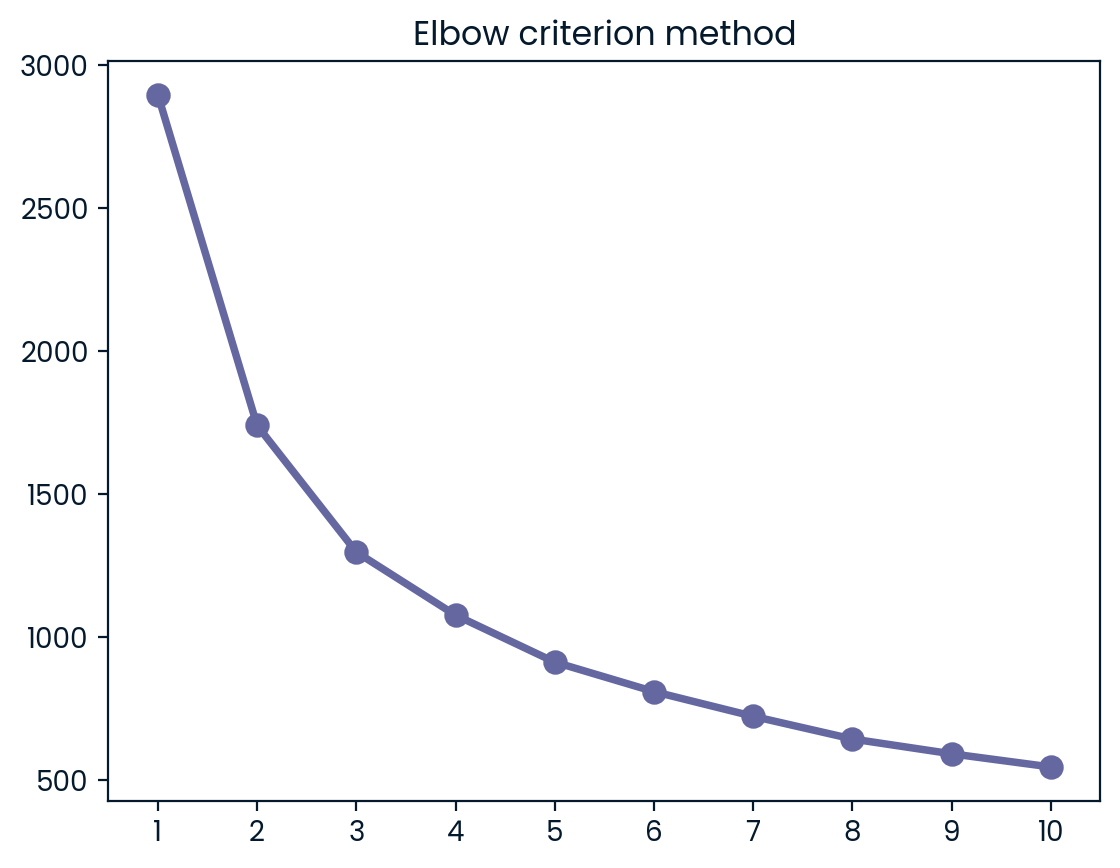

In [214]:
# Explore elbow criterion method to define number of segments
# Iterate through a number of k values, then run clustering for each on the same data, then calculate sum of squared errors for each, then plot SSE against k and identify the elbow - diminishing incremental improvements in error reduction
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=99)
    kmeans.fit(segmentation_data)
    sse[k] = kmeans.inertia_
plt.title('Elbow criterion method')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

For n_clusters = 2, the average silhouette score is 0.3574933292621138
For n_clusters = 3, the average silhouette score is 0.35875100311808583
For n_clusters = 4, the average silhouette score is 0.32885822987778635
For n_clusters = 5, the average silhouette score is 0.35650591403696397
For n_clusters = 6, the average silhouette score is 0.3660514798143639
For n_clusters = 7, the average silhouette score is 0.37970373169916005
For n_clusters = 8, the average silhouette score is 0.3910885229380449
For n_clusters = 9, the average silhouette score is 0.39140696466775976
For n_clusters = 10, the average silhouette score is 0.38427458721640867


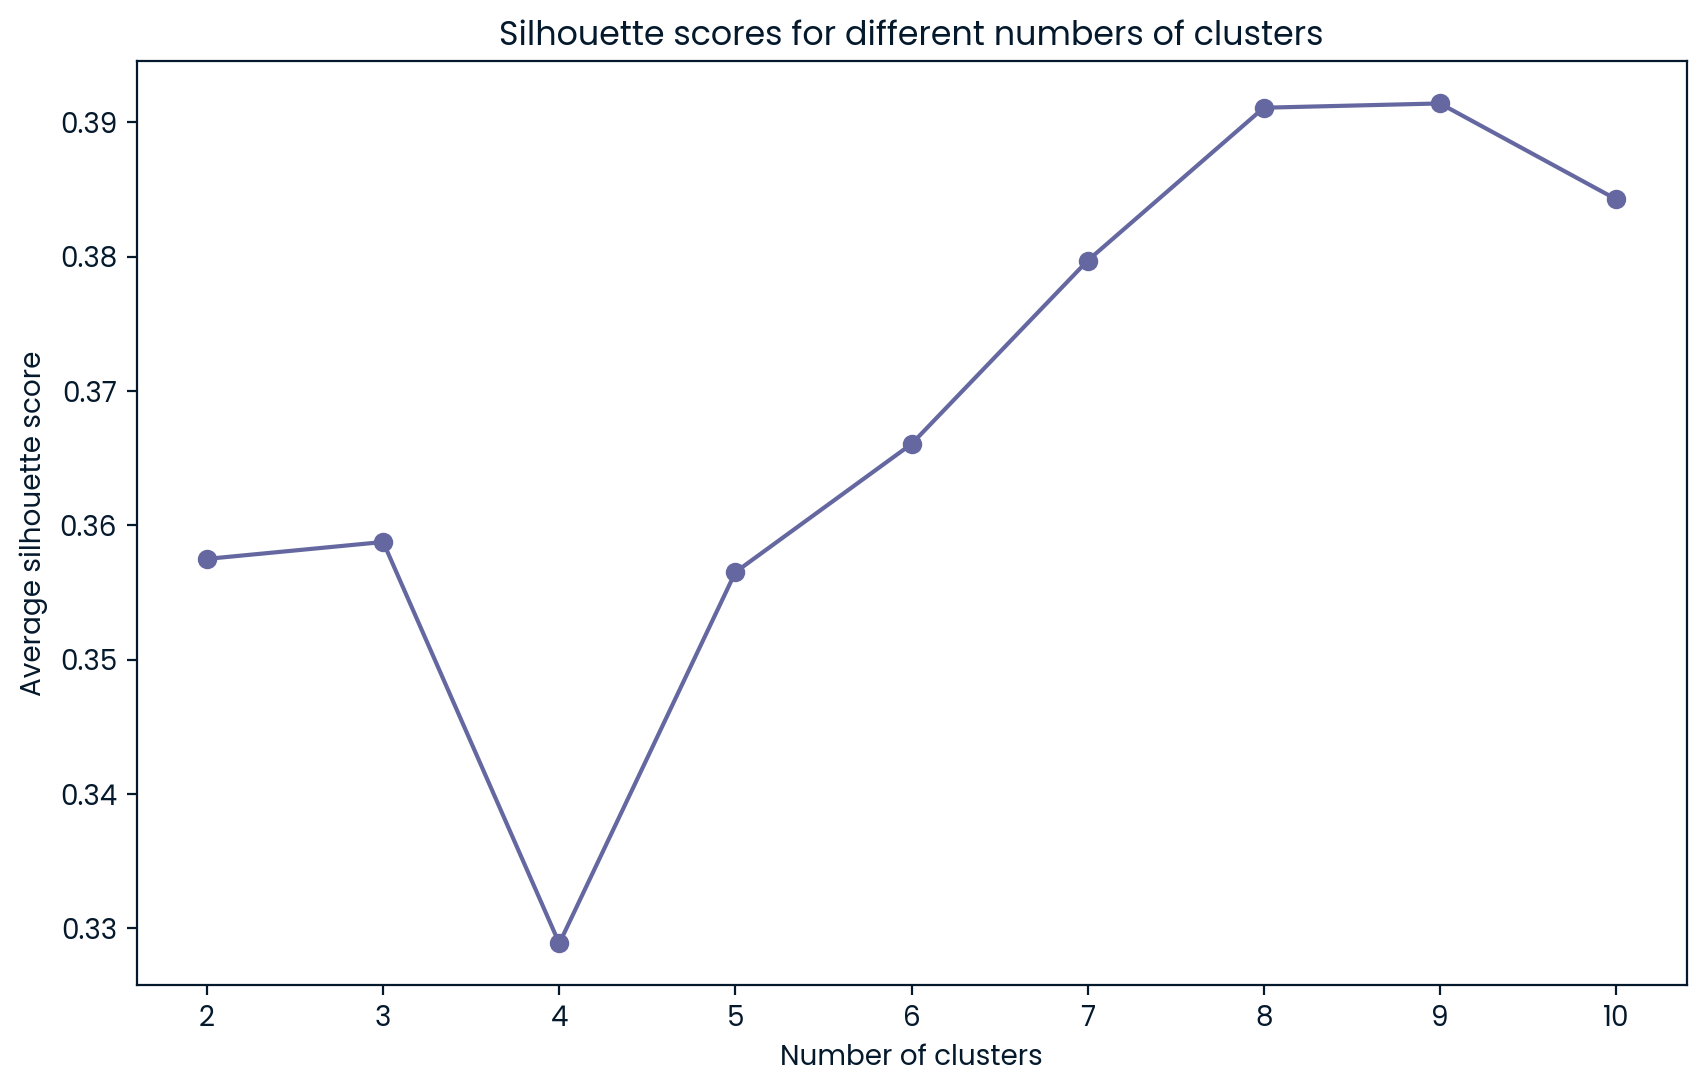

The optimal number of clusters is 9


In [215]:
# Since it is hard to define optimal number of clusters using elbow plot, we will calculate silhouette score
# Range of number of clusters to evaluate
range_n_clusters = list(range(2, 11))

# Create function to evaluate silhouette score for each number of clusters
def silhouette_score_evaluation(df, clusters):
    # List to store the average silhouette scores
    silhouette_avg_scores = []
    for n_clusters in range_n_clusters:
        # Initialize the clusterer with n_clusters
        clusterer = KMeans(n_clusters=n_clusters, random_state=99)
        cluster_labels = clusterer.fit_predict(df)
        
        # Calculate the silhouette score
        silhouette_avg = silhouette_score(df, cluster_labels)
        silhouette_avg_scores.append(silhouette_avg)
        print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg}")
    
    # Plot the silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(range_n_clusters, silhouette_avg_scores, marker='o')
    plt.title("Silhouette scores for different numbers of clusters")
    plt.xlabel("Number of clusters")
    plt.ylabel("Average silhouette score")
    plt.show()

    # Optimal number of clusters
    optimal_n_clusters = range_n_clusters[np.argmax(silhouette_avg_scores)]
    print(f"The optimal number of clusters is {optimal_n_clusters}")
    
silhouette_score_evaluation(segmentation_data, range_n_clusters)

In [216]:
# Create function for adding cluster column to dataset
def add_clusters_column(df, clusters):
    # Initialize the clusterer with n_clusters
    clusterer = KMeans(n_clusters=clusters, random_state=99)
    # Compute k-means clustering on pre-processed data
    clusterer.fit(df)
    # Extract cluster labels from labels_ attribute
    cluster_labels = clusterer.labels_
    # Create a cluster label column in the original df
    new_df = df.assign(cluster_id = cluster_labels)
    return new_df

# We choose 9 clusters as optimal value for our dataset
segmentation = add_clusters_column(segmentation_data, 9)

# Add unscaled numerical columns
segmentation = pd.merge(segmentation, X[['engagement_time', 'engagement_frequency']], left_index=True, right_index=True)
segmentation.drop(['engagement_time_scaled', 'engagement_frequency_scaled'], inplace=True, axis=1)

segmentation.head()

,18-34,35_and_over,under_18,subscription_status,cluster_id,engagement_time,engagement_frequency
0,1,0,0,1,6,5.55,7
1,0,0,1,1,3,5.12,12
2,0,1,0,0,2,4.25,4
3,1,0,0,1,1,8.54,15
4,1,0,0,1,1,12.12,20


In [219]:
analysis = segmentation.groupby(['cluster_id']).agg({
       '18-34': np.sum,
       '35_and_over': np.sum,
       'under_18': np.sum,
       'subscription_status': np.sum,
       'engagement_time': np.mean,
       'engagement_frequency': np.mean}).reset_index().round(0)
analysis

,cluster_id,18-34,35_and_over,under_18,subscription_status,engagement_time,engagement_frequency
0,0,0,88,0,82,6.0,10.0
1,1,145,5,0,150,9.0,17.0
2,2,7,234,0,6,3.0,5.0
3,3,0,0,66,57,7.0,9.0
4,4,9,81,0,87,5.0,19.0
5,5,0,0,63,63,6.0,18.0
6,6,107,0,0,38,6.0,7.0
7,7,97,0,3,70,11.0,7.0
8,8,0,0,95,0,5.0,5.0


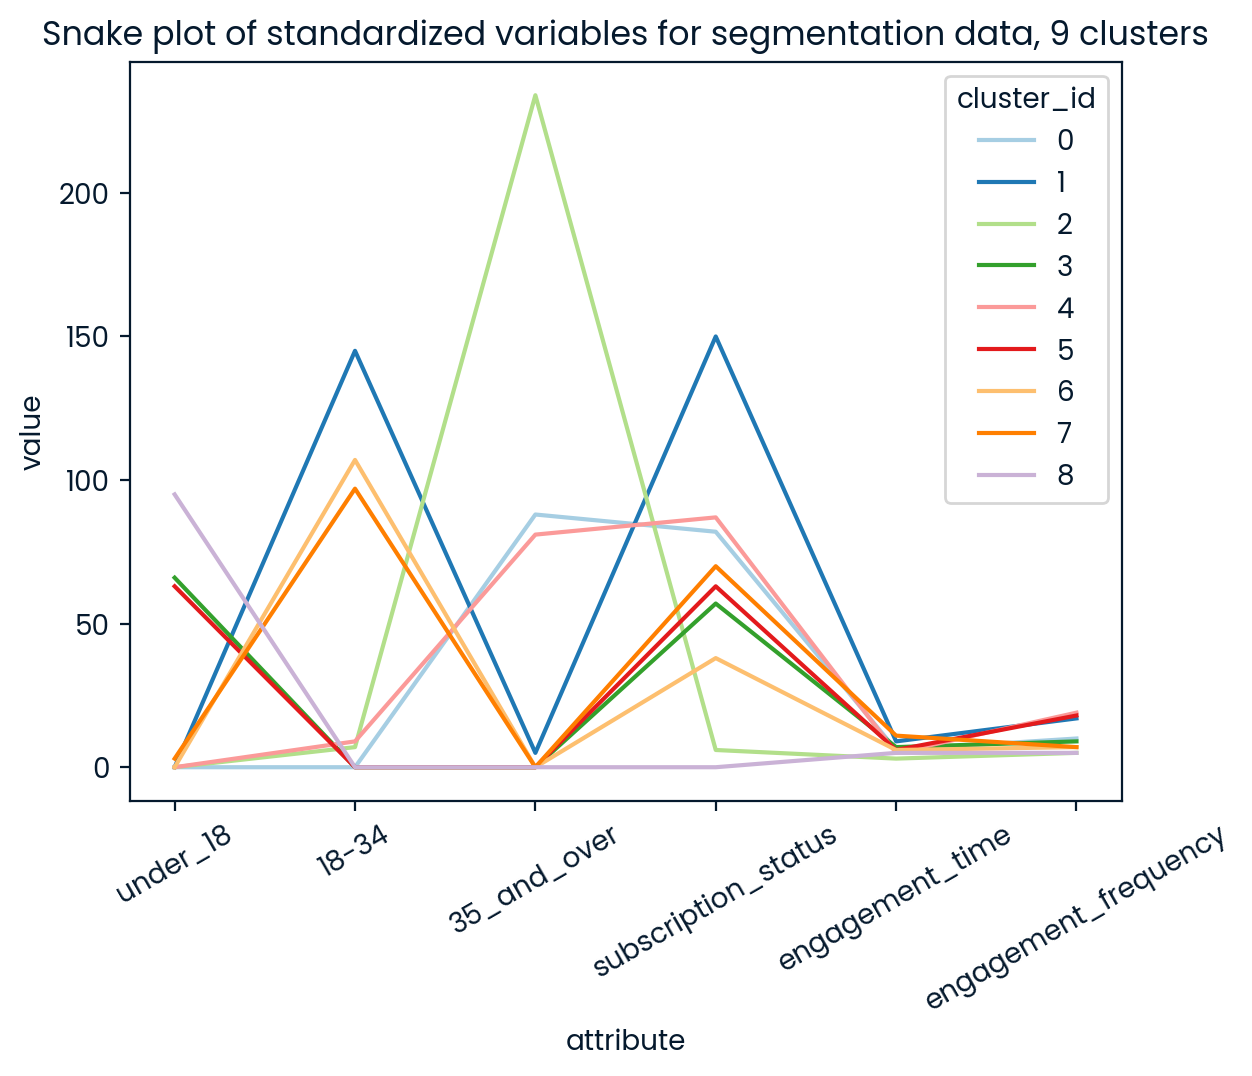

In [220]:
# To make snake plot we melt data into a long format so RFM values and metric names are stored in 1 column each
clusters_melt = pd.melt(analysis.reset_index(),
                                            id_vars=['cluster_id'],
                                            value_vars=['under_18', '18-34', '35_and_over', 'subscription_status', 'engagement_time', 'engagement_frequency'],
                                            var_name='attribute',
                                            value_name='value')

# Visualize a snake plot
plt.title('Snake plot of standardized variables for segmentation data, 9 clusters')
sns.lineplot(x='attribute', y='value', hue='cluster_id', data=clusters_melt, palette=sns.color_palette("Paired"))
plt.xticks(rotation=30)
plt.show()